# Salary Range Prediction

# Step 1: Import Libraries

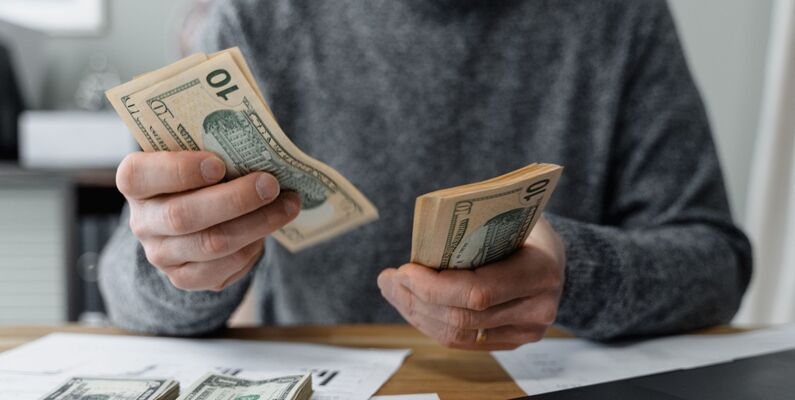

In [154]:
import numpy as np
import pandas as pd

from IPython.display import Image, display

# Display the image with specified width and height
display(Image(filename='dataset-cover.jpg', width=900, height=900))

import warnings
warnings.filterwarnings("ignore")

In [155]:
# Loading the dataset
df = pd.read_csv("Jobs_NYC_Postings.csv")

In [156]:
# let see the data
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024


# Exploring Dataset

In [157]:
# Finding the how much rows and columns dataset have
df.shape

(5120, 31)

In [158]:
# Which are all columns we have lets gone be see
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Average Salary',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [159]:
# Lets check the datatypes
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Average Salary                   float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1 

In [160]:
# Get Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [161]:
# Let see the unique values
df.nunique()

Job ID                           2626
Agency                             59
Posting Type                        2
# Of Positions                     35
Business Title                   1781
Civil Service Title               365
Title Classification                5
Title Code No                     388
Level                              18
Job Category                      183
Full-Time/Part-Time indicator       2
Career Level                        5
Salary Range From                 559
Salary Range To                   748
Average Salary                    984
Salary Frequency                    3
Work Location                     293
Division/Work Unit                852
Job Description                  2518
Minimum Qual Requirements         445
Preferred Skills                 1614
Additional Information            780
To Apply                         1332
Hours/Shift                       315
Work Location 1                   268
Recruitment Contact                 0
Residency Re

In [162]:
# Get the Null values
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Average Salary                      0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Re

In [163]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Average Salary,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,77301.899928,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,36748.806003,NaN
min,469953.000000,1.000000,0.000000,15.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,58405.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,75745.500000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,98571.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,235500.000000,NaN


# Note: 
Look at the above table there is no columns has contain -1 values it means NaN values removed .

# Exploratory Data Analysis & Data Cleaning
- Plotting bargraphs and countplots for numerical and categorical features respectively.
- Removing unwanted columnes
- Handling NaN/Missing values
- removing unwanted alphabet/special characters from the features

In [164]:
columns_to_drop = ['Minimum Qual Requirements', 'Post Until', 
                   'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1']

# Filter the list to include only existing columns
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=existing_columns_to_drop, inplace=True)


In [165]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Jobs_NYC_Postings.csv")

In [166]:
df = df.rename(columns={
   'Job ID':'job_id',
    'Posting Type':'posting_type',
    '# Of Positions':'num_position',
    'Business Title':'business_title',
    'Civil Service Title':'civil_ser_title',
    'Title Code No':'title_code_no',
    'Job Category':'job_category',
    'Full-Time/Part-Time indicator':'full_part_type',
    'Salary Range From':'salary_min',
    'Salary Range To':'salary_max',
    'Salary Frequency':'payment_cycle',
    'Work Location':'work_location',
    'Division/Work Unit':'department',
    'Job Description':'job_description',
    'Minimum Qual Requirements':'min_requirement',
    'Preferred Skills':'prefer_skills',
    'Additional Information':'additional_info',
    'To Apply':'to_apply',
    'Hours/Shift':'rotation',
    'Work Location 1':'Work_Location_extra',
    'Recruitment Contact':'contact',
    'Residency Requirement':'residency_requirement',
    'Posting Date':'post_date',
    'Post Until':'post_end',
    'Posting Updated':'updated_at',
    'Process Date':'process_date'
})

df.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,additional_info,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024


# Visualizing "Agency" column

In [167]:
# Visualising 'Agency' column
df.Agency.value_counts()

Agency
DEPT OF ENVIRONMENT PROTECTION    932
DEPT OF HEALTH/MENTAL HYGIENE     758
HRA/DEPT OF SOCIAL SERVICES       713
DEPARTMENT OF TRANSPORTATION      456
DEPT OF DESIGN & CONSTRUCTION     452
NYC HOUSING AUTHORITY             306
BRONX DISTRICT ATTORNEY           171
DEPARTMENT OF CORRECTION          123
FINANCIAL INFO SVCS AGENCY        117
HOUSING PRESERVATION & DVLPMNT     84
OFFICE OF THE COMPTROLLER          76
ADMIN FOR CHILDREN'S SVCS          75
DEPT. OF HOMELESS SERVICES         72
DEPT OF CITYWIDE ADMIN SVCS        68
DEPARTMENT OF FINANCE              62
OFFICE OF MANAGEMENT & BUDGET      48
TAXI & LIMOUSINE COMMISSION        44
DISTRICT ATTORNEY-MANHATTAN        44
CAMPAIGN FINANCE BOARD             38
LAW DEPARTMENT                     32
CONSUMER AND WORKER PROTECTION     32
DEPARTMENT OF CITY PLANNING        30
OFFICE OF EMERGENCY MANAGEMENT     29
DEPT OF YOUTH & COMM DEV SRVS      28
DEPT OF PARKS & RECREATION         25
NYC EMPLOYEES RETIREMENT SYS       24
DEPAR

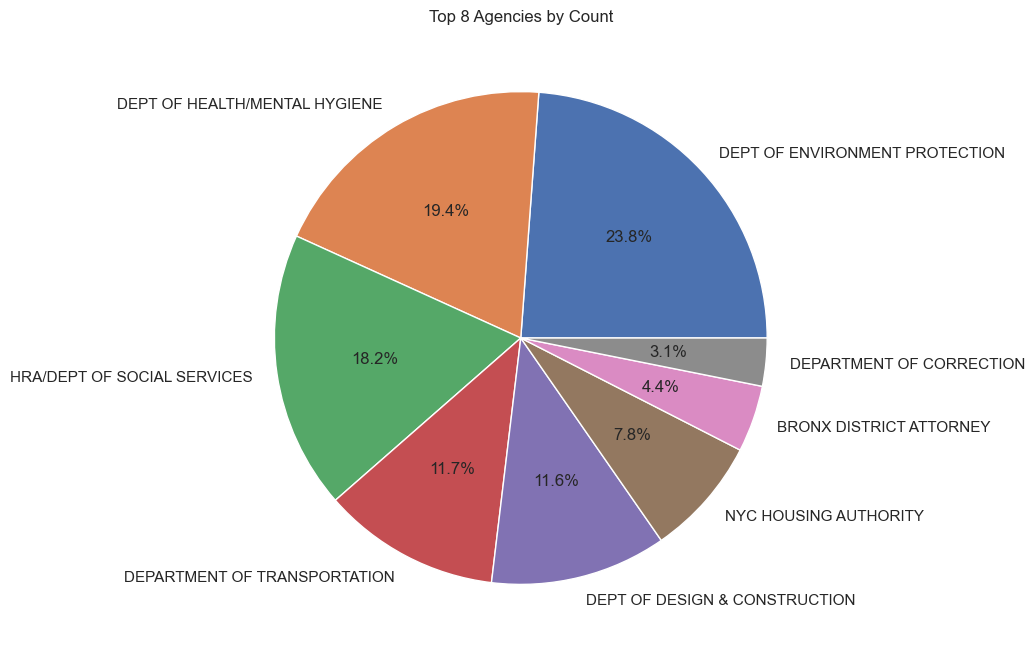

In [168]:
# Create the pie chart with exact counts
# Get the top 15 agencies by count
top_agencies = df['Agency'].value_counts().head(8)

# Plot the pie chart with percentages
plt.figure(figsize=(8, 8))
top_agencies.plot(kind='pie', autopct='%1.1f%%')

# Set title
plt.title('Top 8 Agencies by Count')

# Display the plot
plt.ylabel('')  # This removes the default 'Agency' label for better visualization
plt.show()



### Interpretation of the Top 15 Agencies Pie Chart

The pie chart visualizes the distribution of the top 15 agencies by count, with each slice representing an agency and its corresponding percentage of the total:

1. **Leading Agency**:
   - **Dept of Environment Protection** is the largest segment, accounting for **20.9%** of the total, indicating a significant portion of the workforce is employed here.

2. **Significant Agencies**:
   - **Dept of Health/Mental Hygiene** follows with **17.0%**.
   - **HRA/Dept of Social Services** represents **16.0%**.
   - **Department of Transportation** and **Dept of Design & Construction** both have substantial shares at **10.2%** and **10.1%**, respectively.

3. **Other Notable Agencies**:
   - Agencies like **NYC Housing Authority** (6.9%) and **Bronx District Attorney** (3.8%) show moderate representation.
   - Smaller slices represent agencies with 1.4% to 2.8% of the total, including **Dept of Finance**, **Dept of Homeless Services**, and others.

### Summary

The chart highlights the concentration of employees in a few key agencies, with the top three making up over 50% of the total. This distribution provides insight into the organizational structure and workforce allocation across various city agencies.

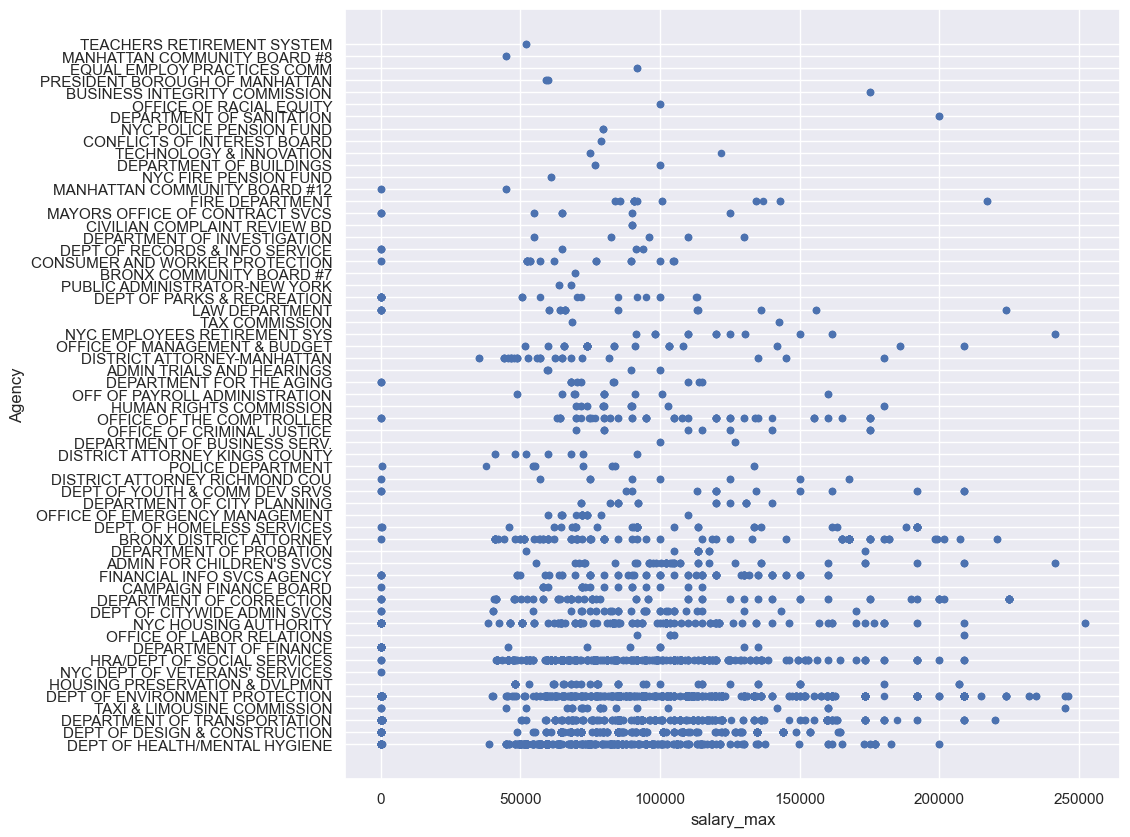

In [90]:
import matplotlib.pyplot as plt
df.plot(y='Agency',x='salary_max', kind='scatter',figsize=(10,10));

### Interpretation of the Scatter Plot: Average Salary vs Agency

1. **Distribution**: The plot shows the distribution of average salaries across different agencies.
2. **Concentration**: There is a high concentration of salaries between \$0  and \$100,000.
3. **Outliers**: A few points extend up to \$200,000, indicating higher salaries in some agencies.
4. **Total Points**: The total number of data points plotted is 5120, as annotated on the graph.

### Summary

The scatter plot provides a clear overview of how average salaries vary among agencies, with most salaries clustering below \$100,000 and a few outliers reaching higher values.

# Visualizing "Posting Type" column

In [91]:
# Visualising 'Posting Type' column

df.posting_type.value_counts()

posting_type
Internal    2612
External    2508
Name: count, dtype: int64

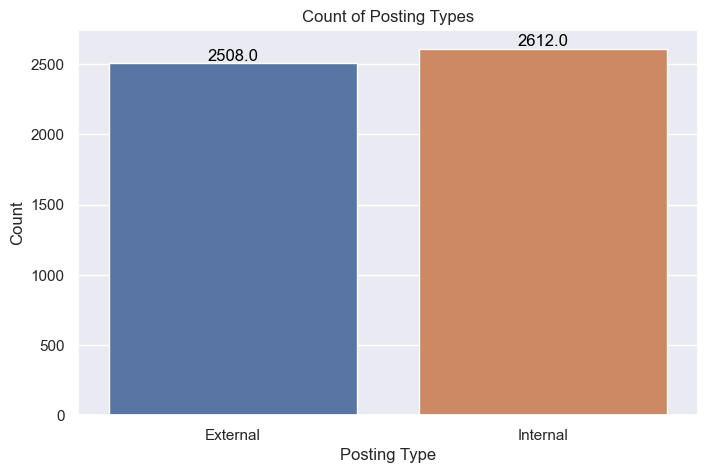

In [92]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x= df['posting_type'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Posting Types')
plt.xlabel('Posting Type')
plt.ylabel('Count')
plt.show()

# Interpretation:
The bar labeled 'External' reaches up to 2508 on the y-axis. This indicates there are 2508 job postings categorized as external.

The bar labeled 'Internal' reaches up to 2612 on the y-axis. This indicates there are 2612 job postings categorized as internal.

Comparison: Internal job postings (2612) slightly outnumber external postings (2508). The difference between the counts (2612 - 2508 = 104) suggests that internal job postings are more common, but not overwhelmingly so.
*Organization implications: If the organization tends to promote from within or promoting internal hiring, which leads them higher internal posting count. Understanding this distribution can help HR departments in workforce planning, ensuring adequate internal opportunities to keep current employees engaged while also bringing in new external talent. Analyzing trends over

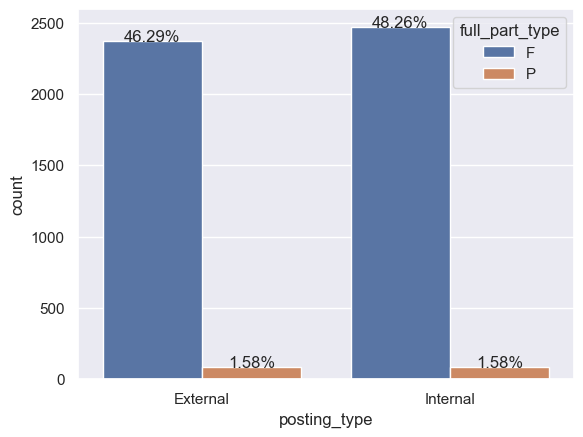

In [93]:
# Visulizing the countplot with the comparison of "Posting_Type" and "Full_part_type"
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
ax = sns.countplot(x='posting_type', data=df, hue='full_part_type')

# Calculate percentage for each bar
total = float(len(df))  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

# Interpretation
- External postings are primarily full-time: The majority of external postings (47.30%) are for full-time roles. Only a small percentage (1.66%) are part-time.

- Internal postings are also mostly full-time: Internal postings follow a similar trend, with the majority (49.34%) being full-time roles, while a smaller portion (1.66%) are part-time.

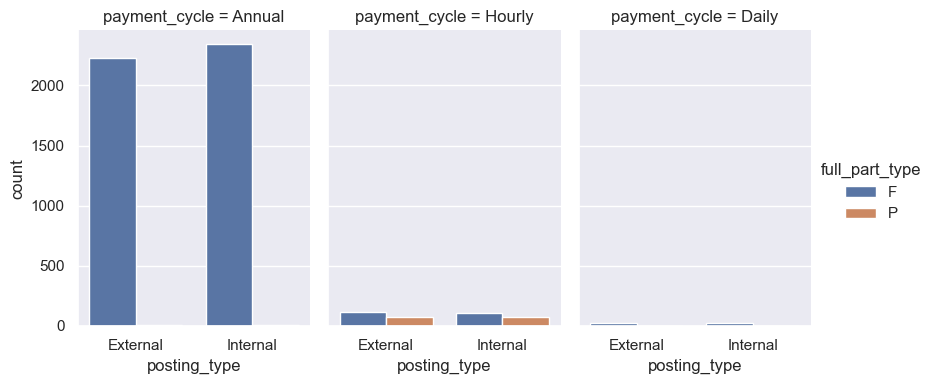

In [94]:
sns.catplot(x="posting_type", hue="full_part_type", col="payment_cycle",
                data=df, kind="count",
                height=4, aspect=.7);

In [95]:
df['full_part_type']= np.where((df['full_part_type'].isnull()) & (df['payment_cycle'] =='Annual'),
                                       'F',df['full_part_type'])
df['full_part_type']= np.where((df['full_part_type'].isnull()) & (df['payment_cycle'] =='Hourly'),
                                       'P',df['full_part_type'])
df['full_part_type'].value_counts()

full_part_type
F    4948
P     170
Name: count, dtype: int64

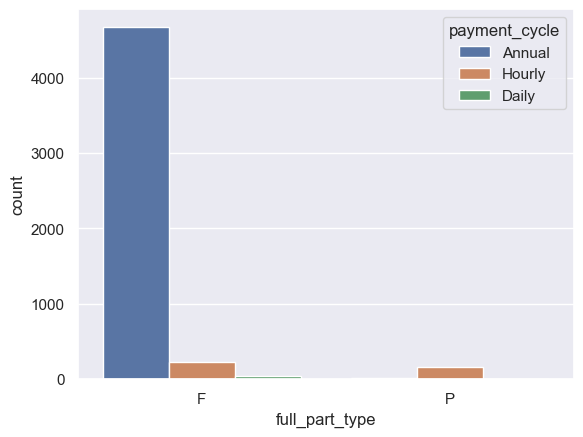

In [96]:
sns.countplot(x='full_part_type', data=df,hue="payment_cycle" );

# Vissualizing "Salary Analysis"

In [97]:
salary_stats = df[['salary_min', 'salary_max', 'payment_cycle']].describe()
print(salary_stats)

          salary_min     salary_max
count    5120.000000    5120.000000
mean    64625.224123   89978.575734
std     31378.516179   46732.299939
min         0.000000      15.000000
25%     51869.000000   64608.000000
50%     62397.000000   85147.000000
75%     80557.000000  113550.000000
max    225000.000000  252165.000000


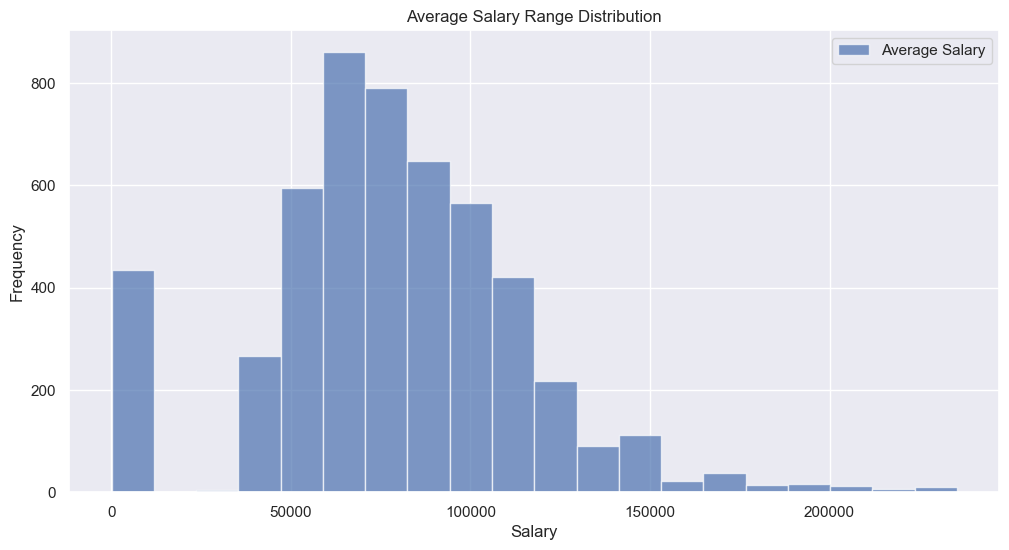

In [98]:
# Plotting histogram on the basis of Salary analysis
plt.figure(figsize=(12,6))
plt.hist(df['Average Salary'], bins=20, alpha=0.7, label='Average Salary')
plt.title('Average Salary Range Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

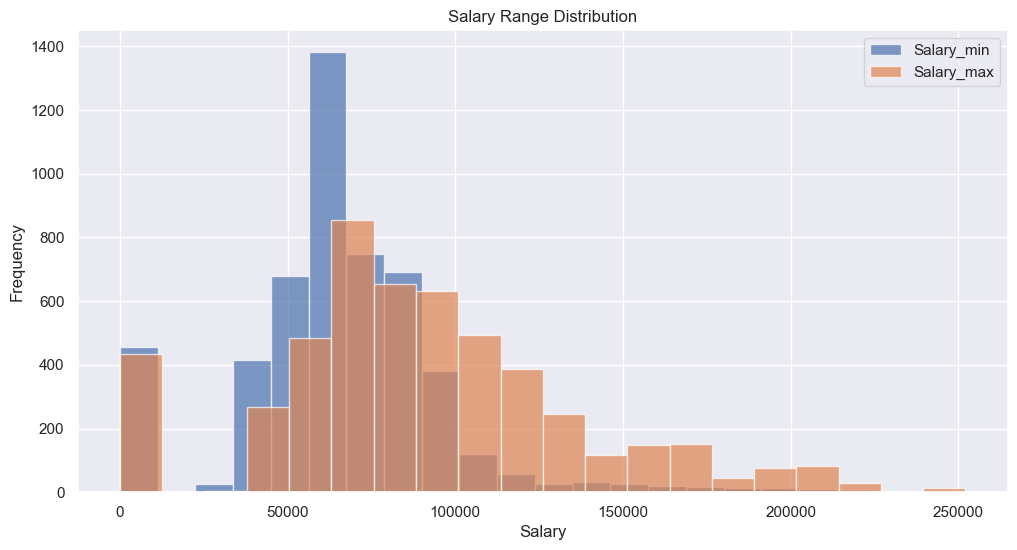

In [99]:
plt.figure(figsize=(12,6))
plt.hist(df['salary_min'], bins=20, alpha=0.7, label='Salary_min')
plt.hist(df['salary_max'], bins=20, alpha=0.7, label='Salary_max')
plt.title('Salary Range Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

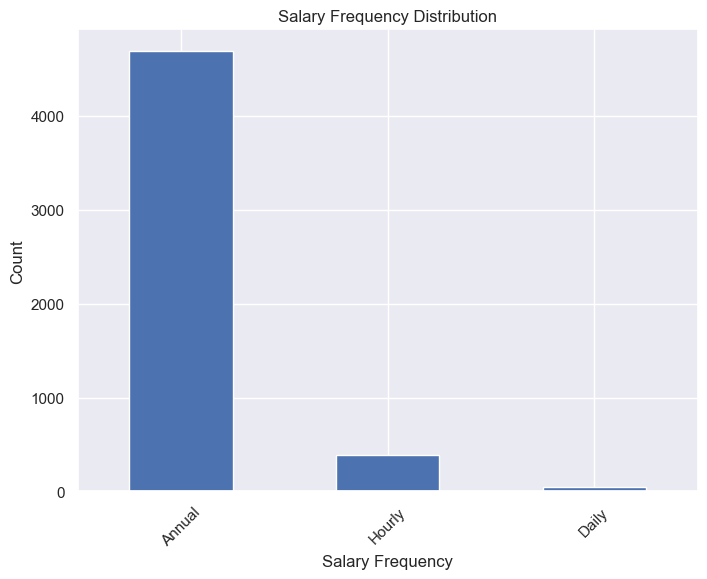

In [100]:
salary_counts = df['payment_cycle'].value_counts()

plt.figure(figsize=(8, 6))
salary_counts.plot(kind='bar')
plt.title('Salary Frequency Distribution')
plt.xlabel('Salary Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [107]:
## the daily salaries are very few so will convert all to hourly
df['salary_min']= np.where((df['payment_cycle'] =='Daily'),df['salary_min']/8,df['salary_min'])
df['salary_max']= np.where((df['payment_cycle'] =='Daily'),df['salary_max']/8,df['salary_max'])

## replace the payment_cycle to hourly
df['payment_cycle'].replace('Daily','Hourly',inplace=True)

In [108]:
## I am going to calculate few features to compare the salaries

df['salary_avg']=(df['salary_min']+df['salary_max'])/2
df.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024,88694.0
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024,96626.0
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024,75043.5
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024,66851.0
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024,99223.5


In [109]:
##   Adding 2 add 2 more features to compare salaries on same scale
## so for hourly rate, we calculate the yearly equivalent salary
## for yearly salary, we calculate the hourly equivalent rate

df['yearly_salary_eq']= np.where(
    (df['payment_cycle'] =='Hourly'),
    df['salary_avg']*8*5*52,
    df['salary_avg'])

df['hourly_rate_eq']= np.where(
    (df['payment_cycle'] =='Annual'),
    df['salary_avg']/8/5/52,
    df['salary_avg'])

df.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg,yearly_salary_eq,hourly_rate_eq
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,2,Constituent Services & Community Programs Heal...,...,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-May-24,01/23/2024,03-04-2024,88694.0,88694.0,42.641346
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Policy, Research & Analysis Public Safety, Ins...",...,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10-03-2023,NaN,11/29/2023,03-04-2024,96626.0,96626.0,46.454808
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,0,"Engineering, Architecture, & Planning",...,NaN,NaN,New York City Residency is not required for th...,02-01-2024,NaN,02-01-2024,03-04-2024,75043.5,75043.5,36.078606
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,2,"Finance, Accounting, & Procurement",...,To be determine.,NaN,New York City residency is generally required ...,04-04-2023,NaN,04-04-2023,03-04-2024,66851.0,66851.0,32.139904
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,3,Constituent Services & Community Programs Heal...,...,NaN,NaN,New York City residency is generally required ...,02-06-2024,05-Jun-24,02/21/2024,03-04-2024,99223.5,99223.5,47.703606


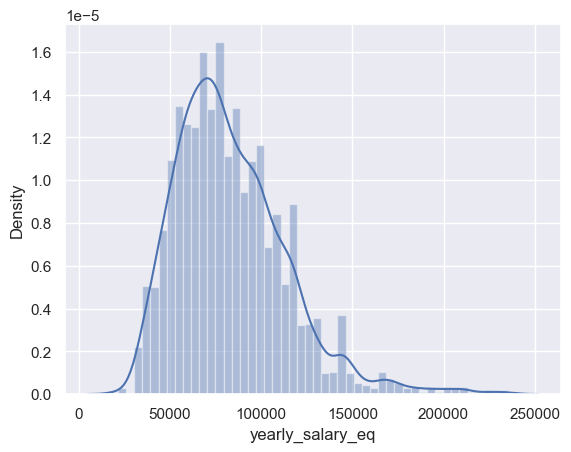

In [111]:
sns.distplot(df['yearly_salary_eq']);

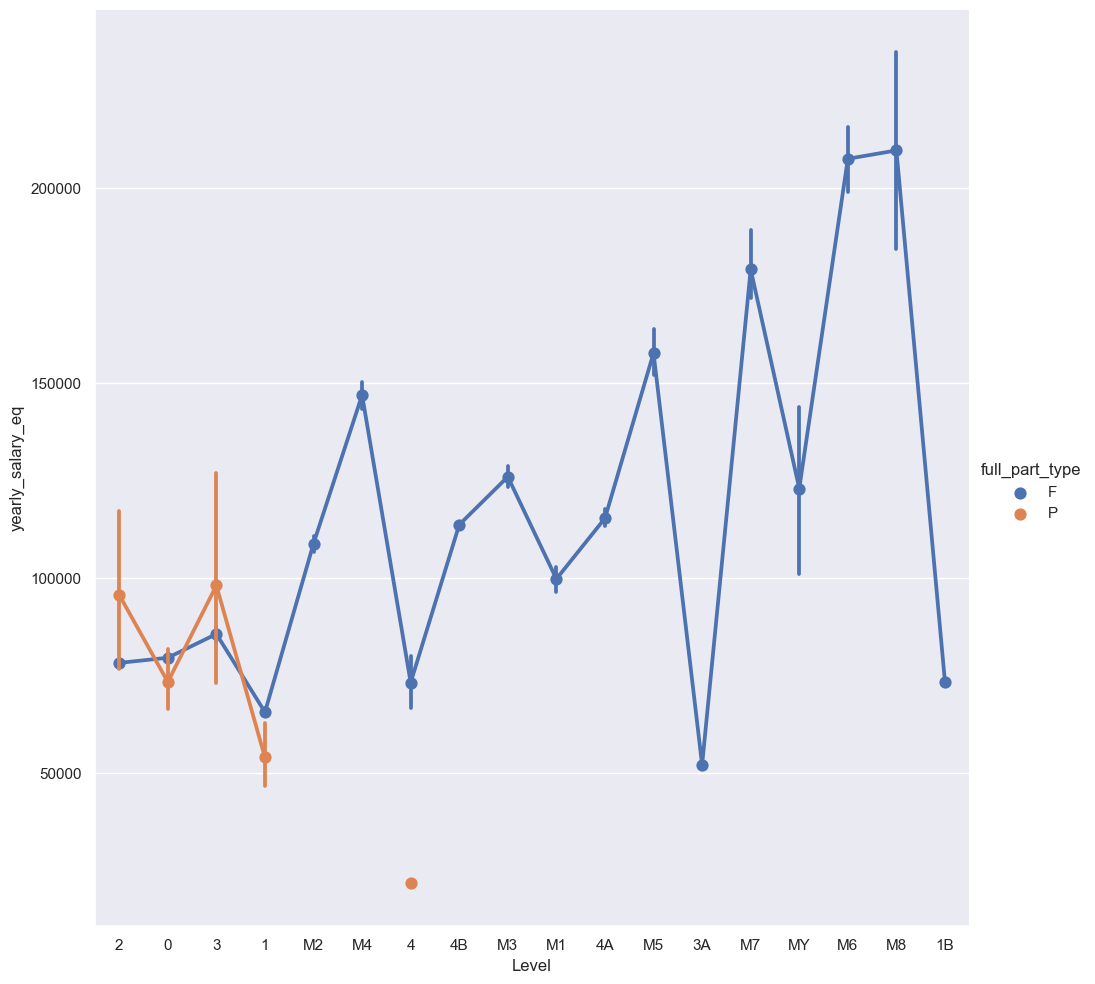

In [112]:
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df, kind="point",
                height=10);

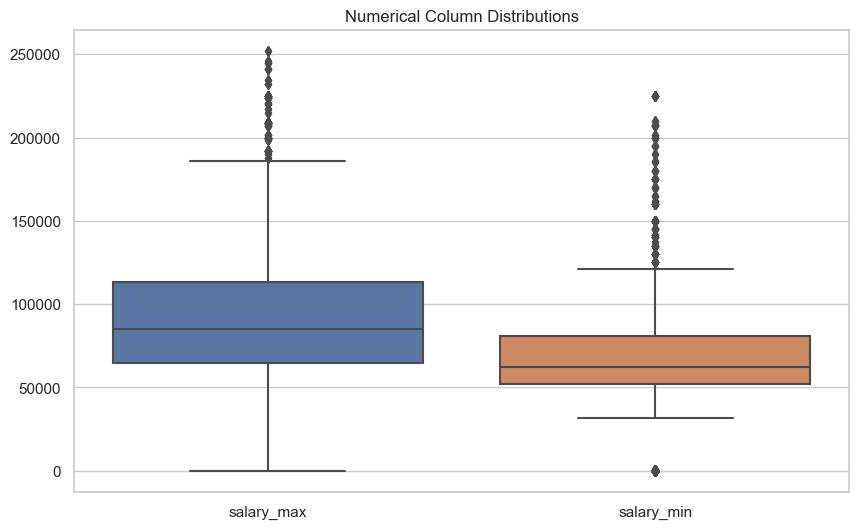

In [169]:
# Visualize the distribution of numerical columns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['payment_cycle', 'salary_max', 'salary_min']])
plt.title('Numerical Column Distributions')
plt.show()

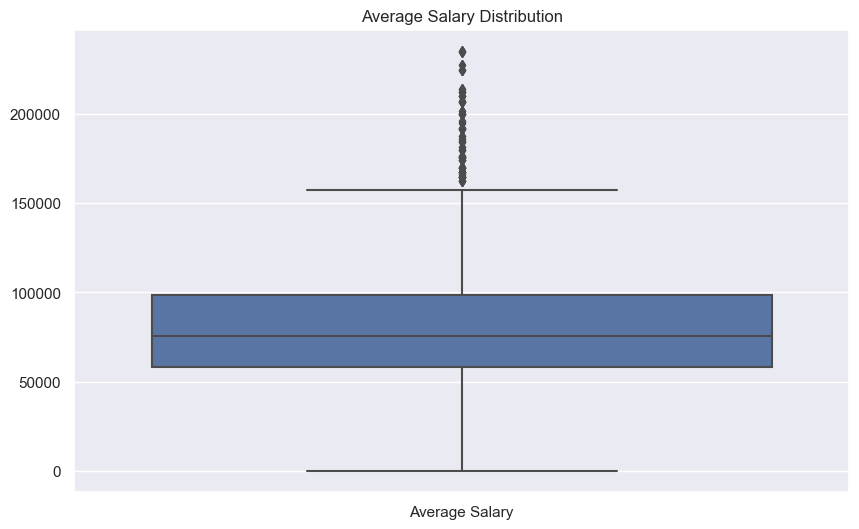

In [170]:
# Visualize the Average Salary distribution
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Average Salary']])
plt.title('Average Salary Distribution')
plt.show()

In [171]:
# Lets Clean the 'Business Title' Column
df['business_title'].value_counts()

business_title
Project Manager                            63
CASE MANAGEMENT SUPERVISOR                 62
ACCOUNTABLE MANAGER                        58
Deputy Director                            38
CASE MANAGEMENT TEAM LEADER                36
                                           ..
Attorney, Litigation Unit (3 positions)     1
Queens North CB Inspection Supervisor       1
Gardener - Randall's Island                 1
Associate Park Service Worker for Fleet     1
ETL/Data warehouse Developer                1
Name: count, Length: 1781, dtype: int64

In [172]:
unique_titles = df['business_title'].unique()
print("Number of unique job titles:", len(unique_titles))
print("Unique Job Titles:")
print(unique_titles)

Number of unique job titles: 1781
Unique Job Titles:
['Research Analyst, IMAT, Bureau of Maternal Infant and Reproductive Health'
 'Deputy Director' 'Senior Project Manager' ...
 'Contract Analyst- Specialized Contract Registration (SCR)'
 'Systems Administrator' 'ETL/Data warehouse Developer']


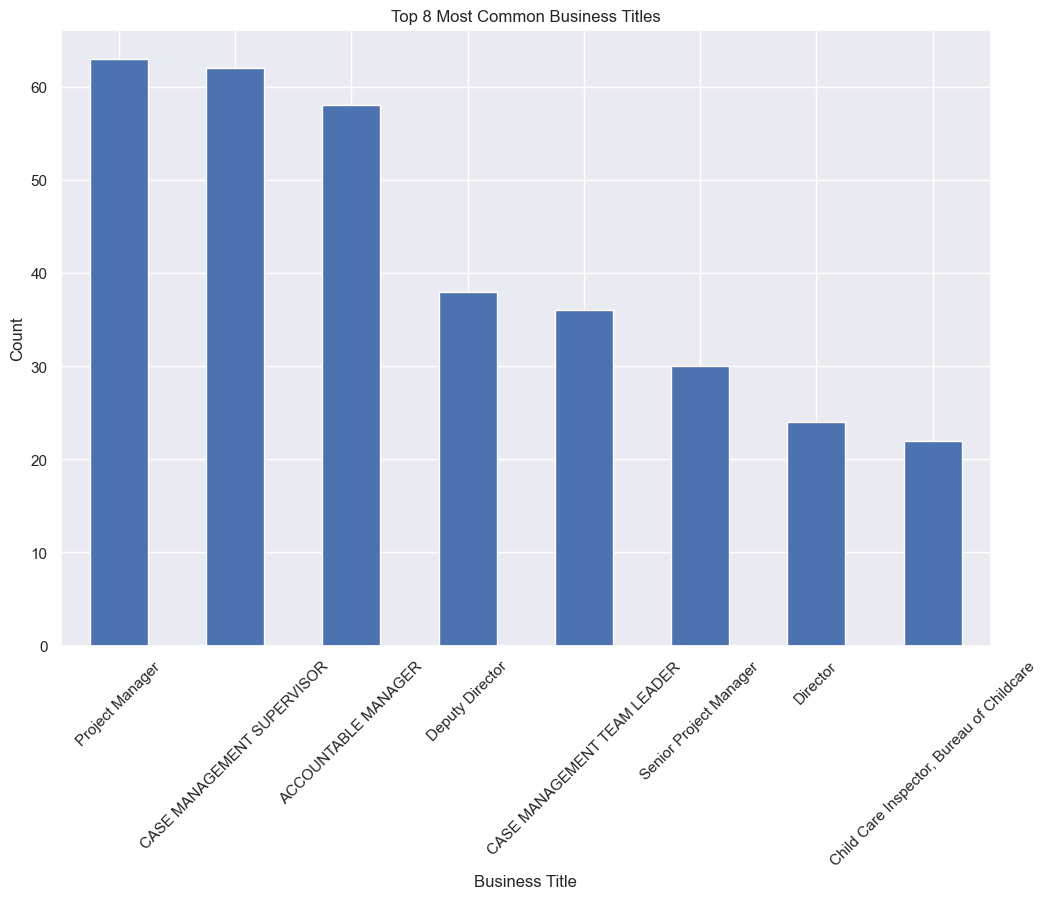

In [173]:
# Visualizing 'Business titles'
top_n_titles = 8
title_counts = df['business_title'].value_counts().head(top_n_titles)

plt.figure(figsize=(12,8))
title_counts.plot(kind='bar')
plt.title(f'Top {top_n_titles} Most Common Business Titles')
plt.xlabel('Business Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [118]:
# In this function we just first converted the Business Title into lower case and then to proper name 
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [119]:
# Applying Funtion
df['business_title']= df['business_title'].apply(title_cleaner)
df['business_title'].value_counts()

business_title
other             3986
manager            559
director           503
data analyst        36
data scientist      34
data engineer        2
Name: count, dtype: int64

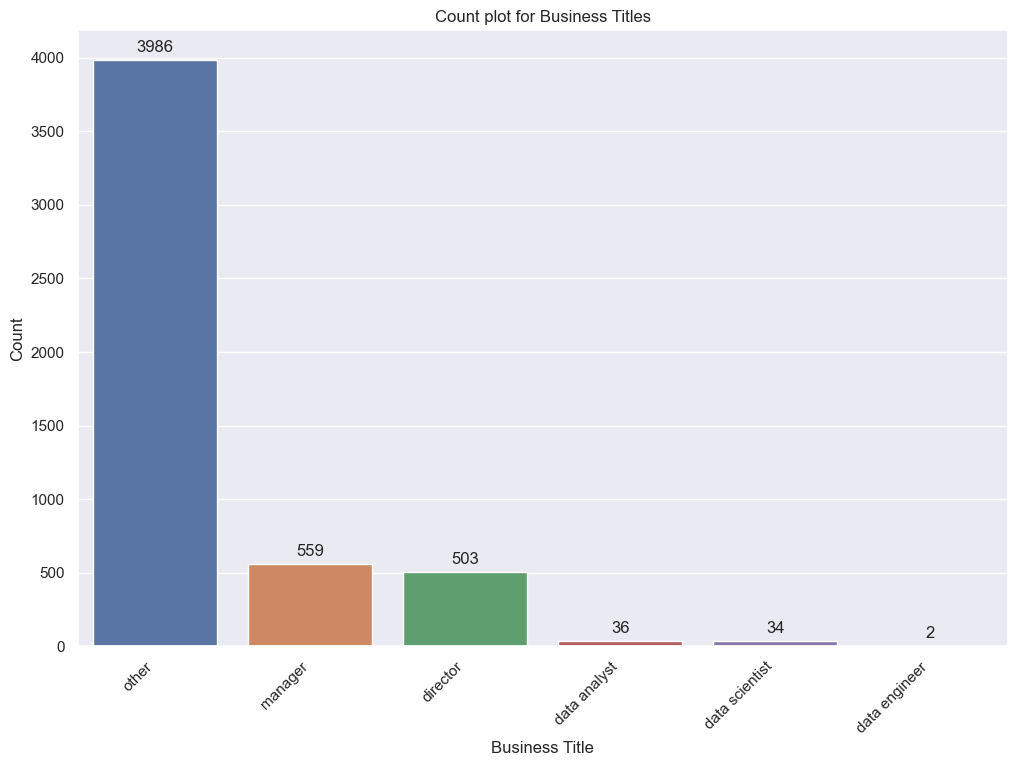

In [120]:
# visualizing the plot for Business Titles
plt.figure(figsize=(12, 8))
g = sns.countplot(x='business_title', data=df, order=df['business_title'].value_counts().index)
plt.title('Count plot for Business Titles')
plt.xlabel('Business Title')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add count labels on top of each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

plt.show()

In [121]:
# Lets Clean the 'Business Title' Column
df['civil_ser_title'].value_counts()

civil_ser_title
COMMUNITY COORDINATOR               269
CITY RESEARCH SCIENTIST             236
PRINCIPAL ADMINISTRATIVE ASSOC      183
COMMUNITY ASSOCIATE                 180
ADMINISTRATIVE STAFF ANALYST (      150
                                   ... 
ASSISTANT TRANSPORTATION SPECI        1
RECREATION SPECIALIST (DEPT OF        1
ADMINISTRATIVE HORTICULTURIST         1
SCHOOL CROSSING GUARD (AL II â      1
ASSISTANT HOUSING MANAGER (HA)        1
Name: count, Length: 365, dtype: int64

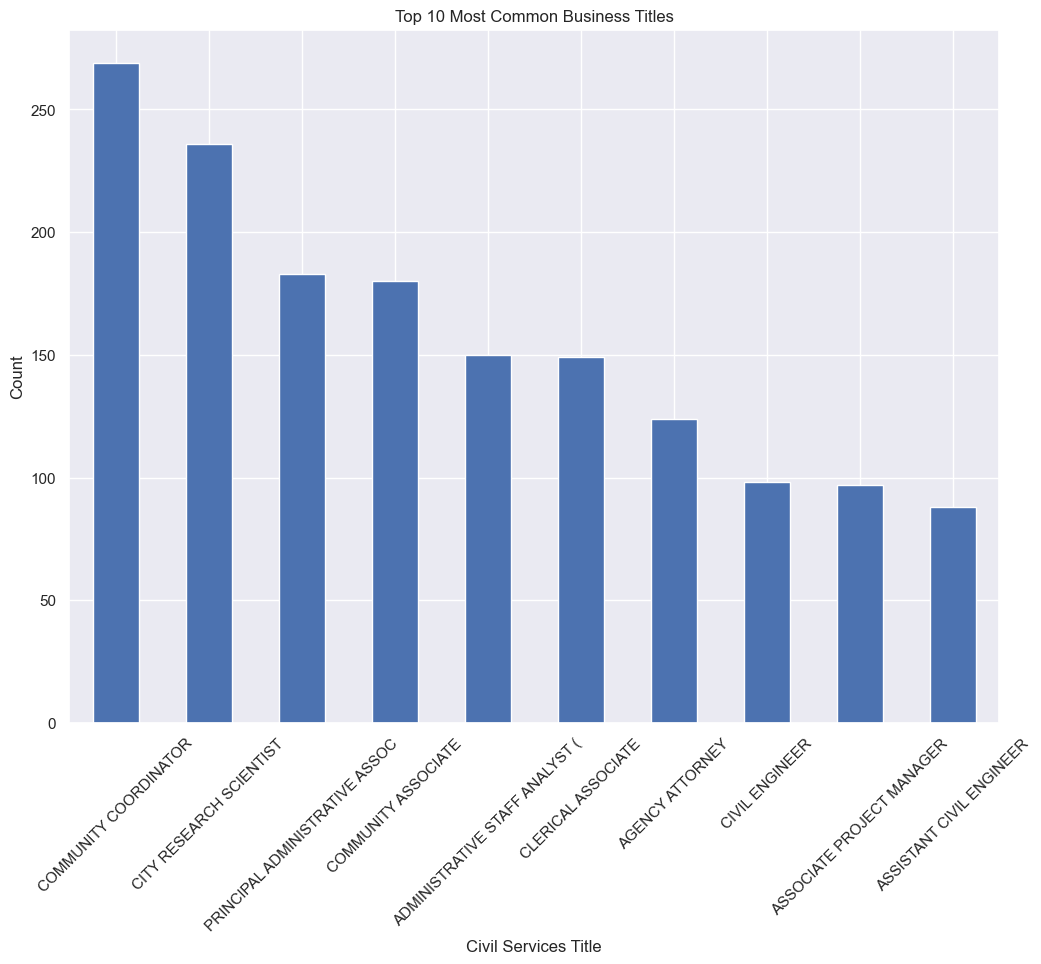

In [122]:
# Visualizing 'civil services title'
top_n_titles = 10
title_counts = df['civil_ser_title'].value_counts().head(top_n_titles)

plt.figure(figsize=(12,9))
title_counts.plot(kind='bar')
plt.title(f'Top 10 Most Common Business Titles')
plt.xlabel('Civil Services Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing "Work Location" 

In [123]:
# Creating a column 'Work location'
df['Work_Location_extra'] = df['Work_Location_extra'].fillna('')
df['work_location'] = df['Work_Location_extra'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())

print('Total number of work locations: {}'.format(len(df['work_location'].unique())))


Total number of work locations: 159


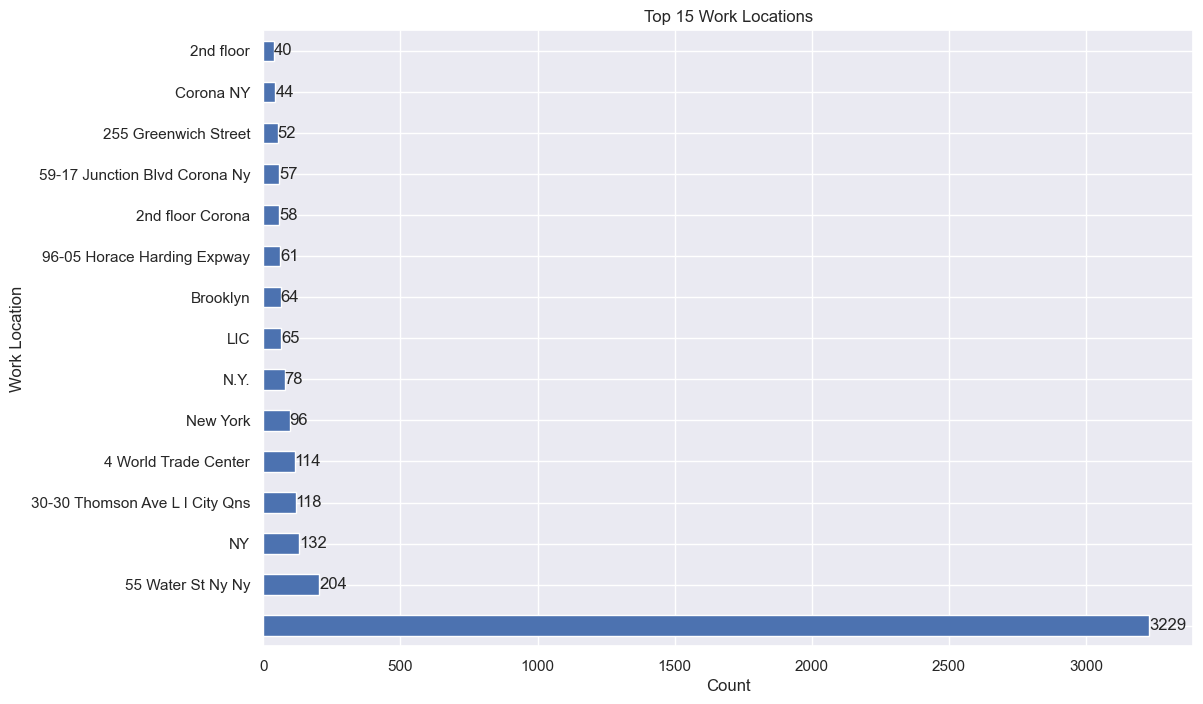

In [124]:
# Creating bar graph for independent work locations in NYC
plt.figure(figsize=(12, 8))
top_work_locations = df["work_location"].value_counts().nlargest(15)

g = top_work_locations.plot(kind='barh')

plt.title('Top 15 Work Locations')
plt.xlabel('Count')
plt.ylabel('Work Location')

# Annotate each bar with the exact count
for index, value in enumerate(top_work_locations):
    plt.text(value, index, str(value), va='center')

plt.show()


# Conclusion of the Work Location Visualization

The horizontal bar plot displays the top 15 work locations by count. Key insights include:

1. **Major Hub**:
   - **55 Water St Ny Ny** is the dominant location with 3229 occurrences, far exceeding other sites.

2. **Significant Sites**:
   - **NY** (132 occurrences) and **30-30 Thomson Ave L I City Qns** (118 occurrences) are notable but much less frequent.
   - **4 World Trade Center** and **New York** have 114 and 96 occurrences, respectively.

3. **Diverse Locations**:
   - Locations like **N.Y.**, **LIC**, and **Brooklyn** show counts from 40 to 78, indicating a spread across multiple sites.

### Summary

The plot reveals a concentration of employees at a few key locations, with 55 Water St Ny Ny being the primary hub. The exact counts annotated on each bar provide clear, precise data for easy comparison and insights into organizational distribution.

# Analyzing "Job category"

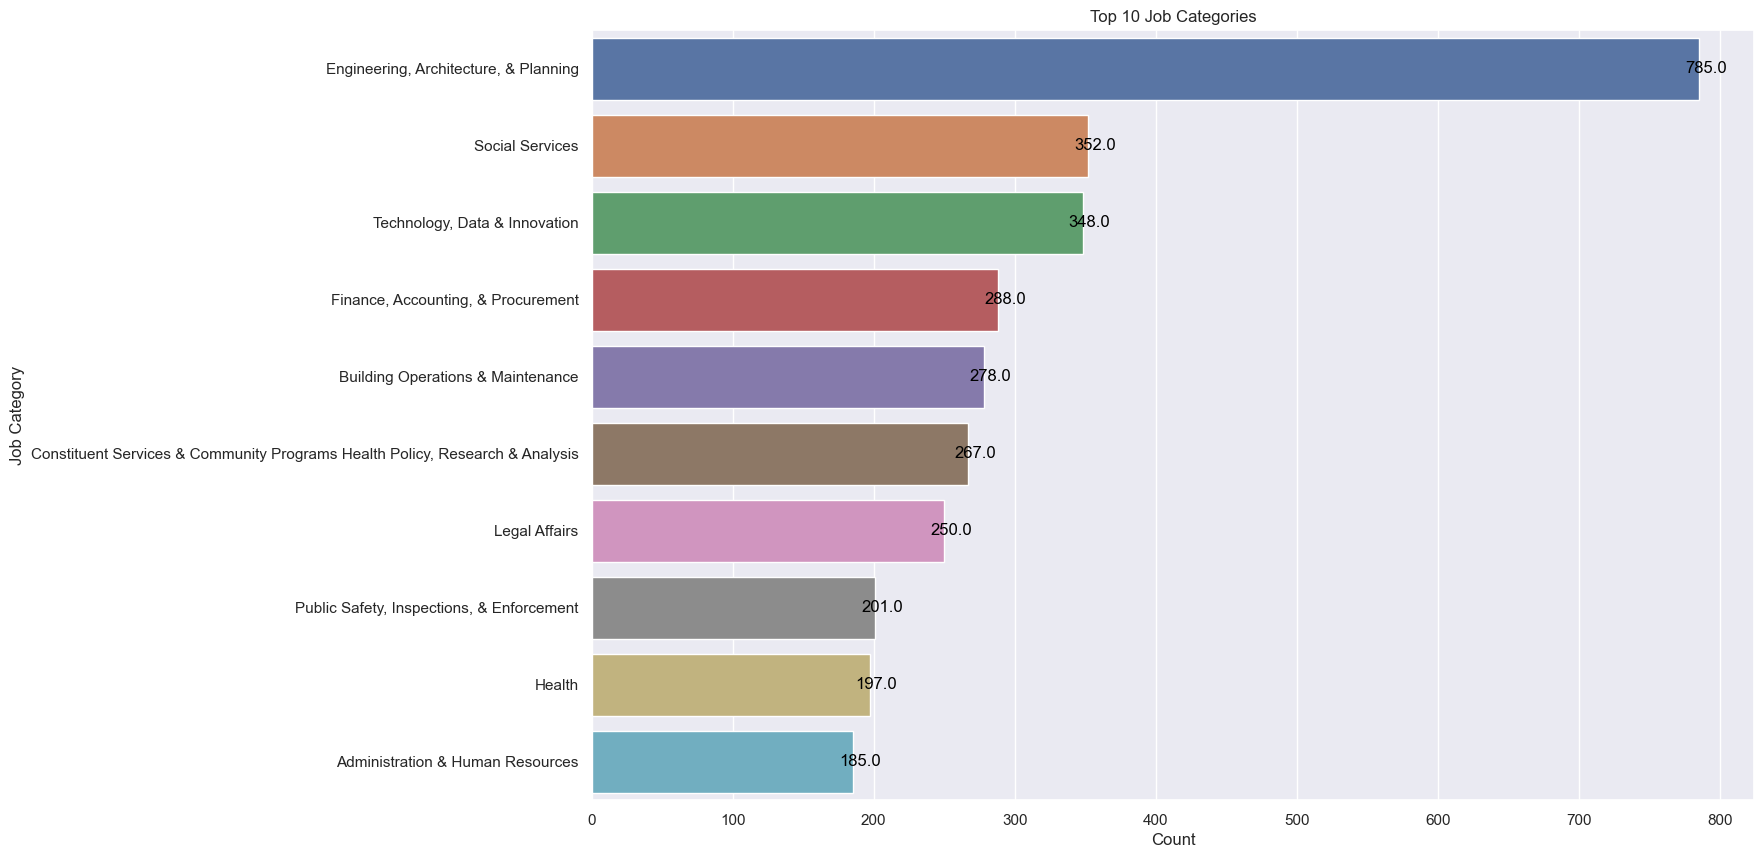

In [125]:
top_categories = df['job_category'].value_counts().nlargest(10).index
top_df = df[df['job_category'].isin(top_categories)]

plt.figure(figsize=(15, 10))  
ax = sns.countplot(y=top_df['job_category'], order=top_categories)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), 
                textcoords='offset points')

plt.title('Top 10 Job Categories')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()

# Visualizing "Job Levels"

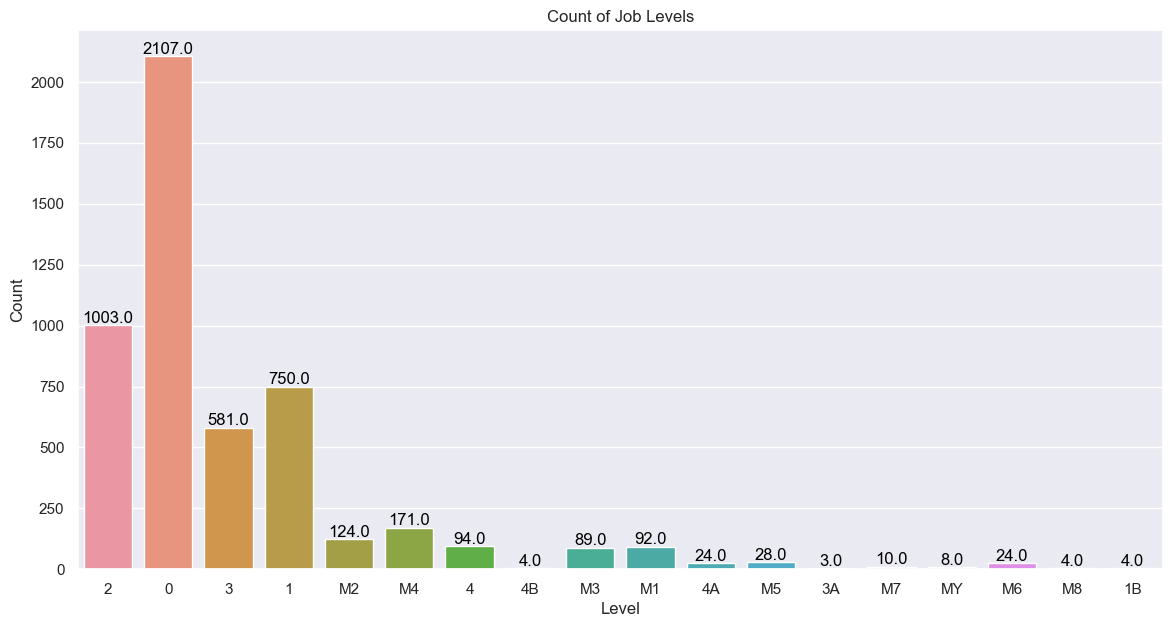

In [126]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x=df['Level'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Job Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

# Distribution Analysis:
The plot shows how job postings are distributed across different levels. Junior level has the highest count, followed by Mid and Senior levels. Organizational Implications:

The higher count of Junior level postings might suggest a focus on entry-level hiring or a higher turnover rate at the junior level. The balance between Mid and Senior levels can indicate career progression opportunities within the organization.

*Strategic Decisions:

HR departments can use this data to ensure balanced hiring across all levels, avoiding potential gaps in experience or skill levels. Understanding the distribution of job levels can help in planning training and development programs to support career growth within the organization.

*Summary: The count plot provides a clear visual representation of job postings across different levels. By annotating the bars with exact counts, the plot becomes more informative, allowing for easy identification of high and low demand areas. This insight can help in strategic planning and decision-making related to recruitment and workforce management.

Replace the example data with your actual dataset to visualize and interpret the distribution of job levels effectively.

# Predictive Modeling - Machine Learning Algorithms

Model Building & Evaluation
  * Linear Regression
  * Random Forest (Ensemble)
  * XGBoost Regressor

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Ensure X is a DataFrame
X = pd.DataFrame(X, columns=df.columns[:-1])

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Identify numerical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),  # Handle missing values in numerical columns
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Handle missing values and encode categorical columns
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that first preprocesses the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Now you can use the model to make predictions
y_pred = model.predict(X_test)
X_pred = model.predict(X_train)

# Print the first few predictions
print(y_pred[:3])
print(X_pred[:3])


[15.74999688 55.2134617  32.13822136]
[68.8701919  72.11538433 20.13870211]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

##Accuracy
print(rf.score(X_train, y_train))

0.9759649976190252

In [ ]:
print("MAE", mean_absolute_error(y_test,rf_pred))
print("MSE", mean_squared_error(y_test, rf_pred))
print("RMSE", np.log(np.sqrt(mean_squared_error(y_test,rf_pred))))
print("R2 score", r2_score(y_test,rf_pred))

MAE 33605.34284574959
MSE 1756612180.1038318
RMSE 10.643326446665922
R2 score -1.04065284559542

Using Random Forest model for tuning hyperparameter it showing 97% accuracy

# XG Boost regressor

In [ ]:
!pip install xgboost
import xgboost as xg

from xgboost import XGBRegressor
xgb = xg.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

#Accuracy
print(xgb.score(X_train, y_train))

   0.9982015817396591

In [ ]:
print("MAE", mean_absolute_error(y_test,xgb_pred))
print("MSE", mean_squared_error(y_test,xgb_pred))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,  xgb_pred))))
print("R2 score", r2_score(y_test,xgb_pred))

MAE 27145.957818899033
MSE 1251976105.4764204
RMSE 10.47399451217733
R2 score -0.4544181300447754

After applying 3 models, getting 99% accuracy after using XGBoost Regression model so this is best model for my data set.

# Model Used:
Used all this model (Linear Regression, Random Forest, XG Boost Regressor) to get the accuracy of dataset and after applying 3 different models, getting 99% accuracy after using XG Boost Regression model so this is best model for my dataset.